# Word Cloud
-  https://docs.google.com/spreadsheets/d/1INLfAoJsnO6eWxUL1B23EcNIyVYY5GZnqXsJLiSGS6w/edit#gid=1196392200

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

## WordCloud
-  WordCloud function from wordcloud allows creating word clouds in Python
-  generate is the one you need to create a word cloud from a text string
-  default, the image size is 400x200 but you can customize the size with width and height 0r using scale (defaults to 1), which is recommended for large word clouds.
-   if you want words to be repeated set repeat = True. This is very useful for creating a word cloud from a single word or small texts.
-  colormap you can customize the color palette used to draw the colors for each word. These colors are randomly selected from the color map.
-  background_color argument can be used to override the default black color of the word cloud image.
-  min_font_size (default: 4) and max_font_size (default: None) arguments which are the smallest and largest font size to use within the word cloud
-  word cloud will try to fit up to 200 words, but you can decrease the number of words with max_words
-  Stop words are the words that will be eliminated from the word cloud image. By default the function takes into account a predefined list of stop words, but you can set your own with stopwords. stopwords =[ .....]
-  Python word clouds doesn’t include numbers by default, but setting include_numbers = True will add them.
-  you can mask a shape or an image on where to draw word to a Python word cloud with mask. Note that if mask is not None, width and height will be ignored

In [3]:
sheet_id = '1INLfAoJsnO6eWxUL1B23EcNIyVYY5GZnqXsJLiSGS6w'
sheet_name = 'pizza'
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

In [4]:
df = pd.read_csv(url)

In [5]:
df.shape

(106, 2)

In [6]:
df.head()
#yearwise feedback received

,year,feedback
0,2018,“Amazing Food.”
1,2018,“Awesome Breakfast”
2,2018,“Best Place”
3,2018,“Delicious”
4,2018,“Good Breakfast”


In [7]:
df

,year,feedback
0,2018,“Amazing Food.”
1,2018,“Awesome Breakfast”
2,2018,“Best Place”
3,2018,“Delicious”
4,2018,“Good Breakfast”
...,...,...
101,2022,Review us on TripAdvisor
102,2022,Stack of fresh cranberry pancakes with whipped...
103,2022,Strawberry Waffle
104,2022,Submit a Review


In [8]:
text = ''.join(cat for cat in df.feedback)

In [9]:
text[1:50]

'Amazing Food.”“Awesome Breakfast”“Best Place”“Del'

In [10]:
wc1 = WordCloud( width=1000, height=800, random_state=123, background_color='salmon', colormap = 'Pastel1', \
                collocations=False, stopwords = STOPWORDS ).generate(text)
wc1

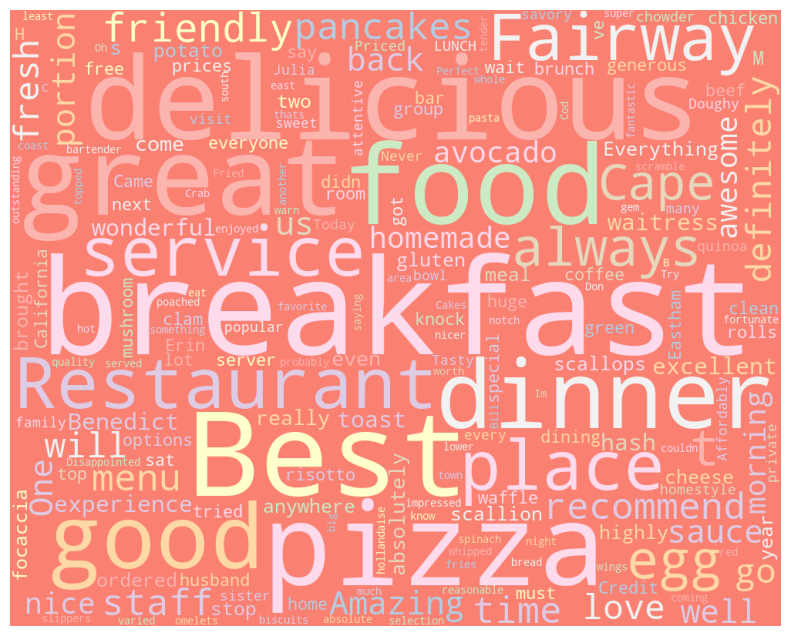

In [11]:
plt.figure(figsize=(10,8))
plt.imshow(wc1)
plt.axis('off')
plt.show();

## mask the word cloud

In [ ]:
mask1 = np.array(Image.open('E:/analytics/projects/hrAnalytics/images/comment2.png'))
mask1[1:2]

In [ ]:
plt.imshow(mask1)

In [ ]:
wc2 = WordCloud(width=3000, height=2000, random_state=123,  background_color="purple", colormap="Set2", max_words=20, \
                collocations=False, stopwords=STOPWORDS, mask=mask1 ).generate(text)
wc2

In [ ]:
plt.figure(figsize=(8,6))
plt.imshow(wc2)
plt.axis('off')
plt.show();

In [ ]:
# customise mask
x, y = np.ogrid[:300, :300]
mask3 = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask3 = 255 * mask3.astype(int)
mask3

In [ ]:
#WC 3
wc3 = WordCloud(  width=3000,  height=2000,  random_state=123,  background_color="purple", colormap="Set2", \
                collocations=False, stopwords=STOPWORDS, mask=mask3 ).generate(text)
wc3

In [ ]:
plt.axis("off")
plt.imshow(wc3, interpolation = "bilinear")
plt.show()

# Word Cloud Variety
-  https://python-charts.com/ranking/wordcloud-matplotlib/

In [ ]:
# wc4
import requests
from io import BytesIO
onlineImg = requests.get("https://raw.githubusercontent.com/R-CoderDotCom/samples/main/wordcloud-mask.jpg")
mask4 = np.array(Image.open(BytesIO(onlineImg.content)))
mask4[1:2]

In [ ]:
wc4 = WordCloud(background_color = "white", repeat = False, mask = mask4)  #repeat False
wc4.generate(text)

In [ ]:
plt.figure(figsize=(10,8))
plt.axis("off")
plt.imshow(wc4, interpolation = "bilinear")
plt.show();

In [ ]:
textHR = "HR Data Analytics with Python"
#repeating text
# Circle mask
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(height = 900, width = 1500, background_color = "white",  repeat = True, mask = mask, contour_width = 3, contour_color = "black")
wc.generate(textHR)
plt.figure(figsize=(8,6))
plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")
plt.show();

In [ ]:
#end here